In [2]:
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
result_files = {
    # "18B": "/raid/s3/opengptx/behzad_shomali/wmt20_results/18-11B/results/Behzadshomali/Multilingual5/results_2025-08-18T00-31-07.152742.json",
    # "22B": "/raid/s3/opengptx/behzad_shomali/checkpoints/2025-08-14__15-48-49_c15155eb/wmt20_results/results/Behzadshomali/Multilingual5/results_2025-08-15T16-34-30.023999.json",
    "29B": "/raid/s3/opengptx/behzad_shomali/internal_european_leaderboard/29-44B//results/Behzadshomali/Multilingual5/results_2025-08-20T14-24-33.572183.json"

}

In [33]:
def plot_each_model_result(result_file, ax, labels=None, sorted_benchmarks=None, legend=None, k=0, benchmark_group=None, metric=None):
    patterns = [ "", "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

    results_json = json.load(open(result_file, "r"))
    results = {}
    benchmarks_num = 0

    benchmarks = results_json["results"].keys()
    for benchmark in benchmarks:
        if  benchmark not in ["all"]:
            if benchmark_group in benchmark: 
                results[benchmark] = results_json["results"][benchmark]
                benchmarks_num += 1

    # assert benchmarks_num == len(results), f"Expected {benchmarks_num} benchmarks, but got {len(results)}"

    if sorted_benchmarks is None:
        results = dict(sorted(results.items(), key=lambda item: item[1][metric], reverse=False))
        sorted_benchmarks = list(results.keys())


    if labels is None:
        try:
            labels = []
            # pattern = r"wmt20:(.+?)\|(\d+)"
            pattern = ""
            for key in sorted_benchmarks:
                match = re.search(pattern, key)
                if match:
                    lang_pair = match.group(1)
                    lang_pair = lang_pair.replace("_", "")
                    labels.append(f"{lang_pair} (#{match.group(2)})")
                else:
                    print("XXX",key)
        except:
            labels = sorted_benchmarks

    current_results, current_labels, current_errors = [], [], []
    current_results_indices = []
    for index, benchmark in enumerate(sorted_benchmarks):
        if benchmark in results:
            current_results.append(results[benchmark][metric])
            current_labels.append(labels[sorted_benchmarks.index(benchmark)])
            current_errors.append(results[benchmark][f"{metric}_stderr"])
            current_results_indices.append(index)
        else:
            print(f"Warning: {benchmark} not found in results")
    if legend is not None:
        ax.barh(current_labels, current_results, label=legend, alpha=0.5, hatch=patterns[k])
    else:
        ax.barh(current_labels, current_results, alpha=0.5, hatch=patterns[k])

    # plot the std deviation as error bars
    ax.errorbar(
        current_results,
        current_results_indices,
        xerr=current_errors,
        fmt='o',
        # label=f"{legend} (stderr)"
    )

    ax.set_xlabel(f'{metric} Score')
    ax.set_title('WMT20 Evaluation Results')
    ax.legend()

    return ax, sorted_benchmarks, labels

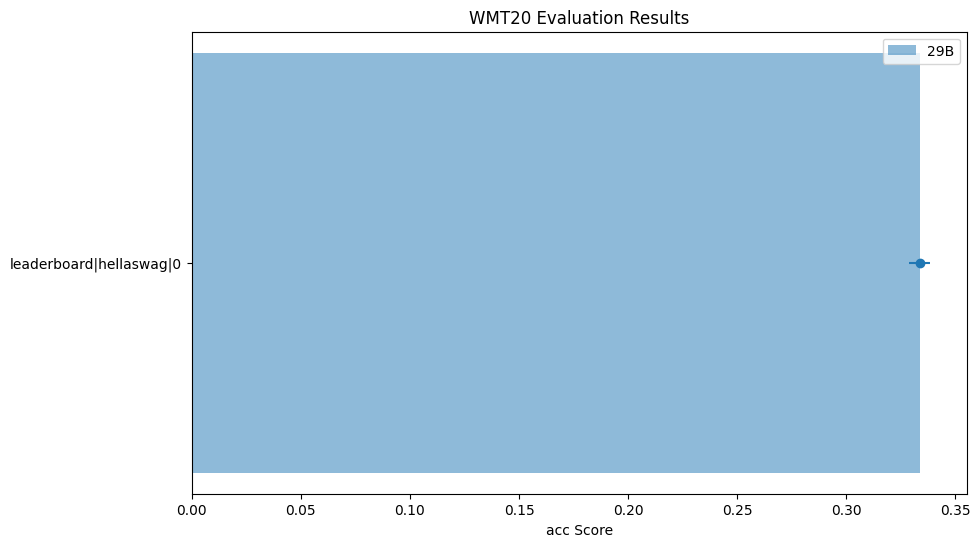

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

sorted_benchmarks = None
labels = None
index = 0
for legend, result_file in result_files.items():
    if index != 1:
        ax, sorted_benchmarks, labels = plot_each_model_result(result_file, ax, sorted_benchmarks=sorted_benchmarks, labels=labels, legend=legend, k=index, benchmark_group="leaderboard|hellaswag", metric="acc")
    index += 1


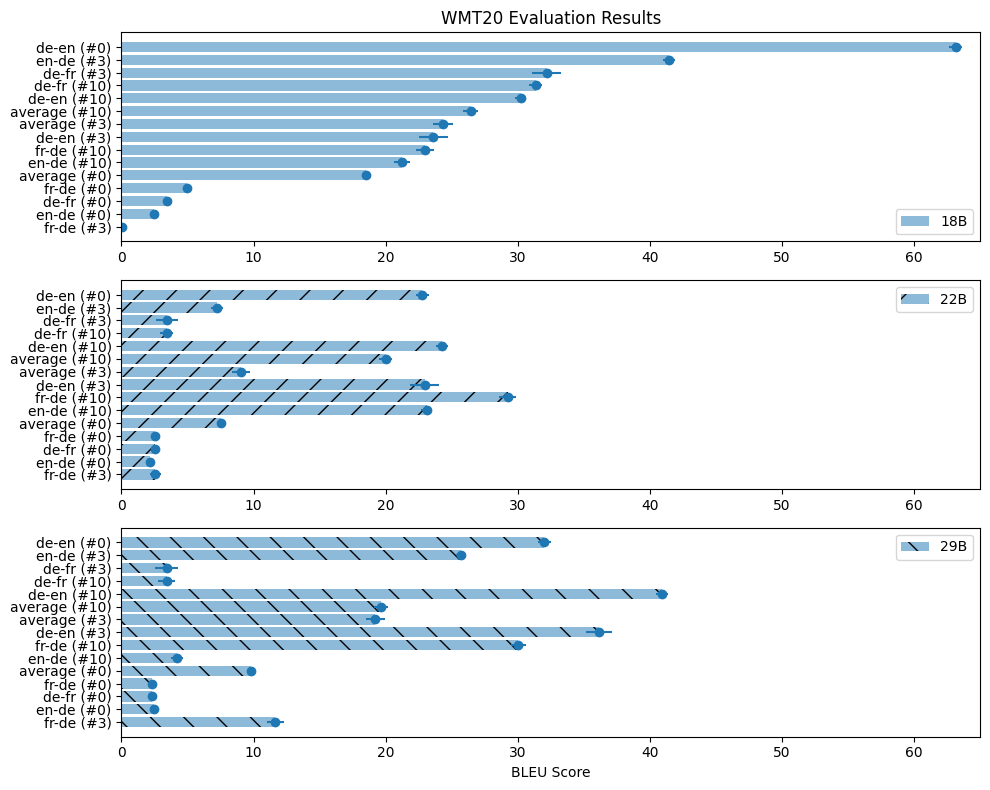

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

sorted_benchmarks = None
labels = None
index = 0
for legend, result_file in result_files.items():
    _, sorted_benchmarks, labels = plot_each_model_result(result_file, axs[index], sorted_benchmarks=sorted_benchmarks, labels=labels, legend=legend, k=index)
    index += 1

axs[1].set_title("")
axs[2].set_title("")

axs[0].set_xlabel("")
axs[1].set_xlabel("")

axs[0].set_xlim([0, 65])
axs[1].set_xlim([0, 65])
axs[2].set_xlim([0, 65])


plt.tight_layout()
